# Lab 4.02 - Bivariate Analysis of Qualitative Data

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 2 - NBA Salaries

The file NBA.csv contains annual salaries for all NBA basketball players in the season (2008–2009), check whether there is independence between position and salary. To do this, first change any hyphenated position such as C-F to 
the first listed, in this case C. (Presumably, this is 
the player's primary position.)     
Then remove $ and . in Annual Salary and make Annual Salary categorical with four categories: the first is all salaries below the first quartile, the second is all salaries from the first quartile to the median, and so on.  
First make a plot

Results of the main calculations:
  - χ² ≈ 3.0344 
  - p-value = 0.8045
  - We do not reject H0


  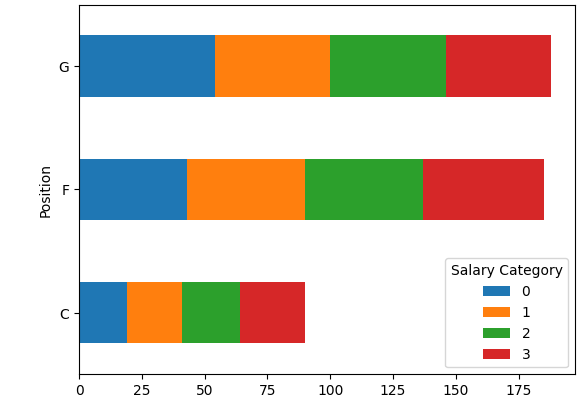

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/NBA.csv', sep=";")
df.head(10)

,Player,Team,Position,Annual Salary,Contract Yrs,Contract Amt,Contract Thru
0,"Bibby, Mike",Atlanta Hawks,G,$14.983.603,1,$14.983.603,2008-09
1,"Johnson, Joe",Atlanta Hawks,G,$14.232.566,5,$70.000.000,2009-10
2,"Smith, Josh",Atlanta Hawks,F,$10.000.000,5,$58.000.000,2012-13
3,"Claxton, Speedy",Atlanta Hawks,G,$5.757.818,4,$25.000.000,2010-11
4,"Williams, Marvin",Atlanta Hawks,F,$5.636.142,4,$18.160.000,2008-09(t)
5,"Horford, Al",Atlanta Hawks,C-F,$4.023.720,3,$12.080.160,2009-10
6,"Pachulia, Zaza",Atlanta Hawks,C,$4.000.000,4,$16.000.000,2008-09
7,"Evans, Maurice",Atlanta Hawks,F-G,$2.500.000,3,$7.500.000,2010-11
8,"Law, Acie",Atlanta Hawks,G,$2.071.680,3,$6.214.920,2009-10
9,"Murray, Ronald",Atlanta Hawks,G,$1.500.000,1,$1.500.000,2008-09


In [22]:
df["Position"] = df["Position"].str[0]

In [23]:
df["Annual Salary"] = df["Annual Salary"].str[1:].str.replace(".", '')
df["Annual Salary"] = df["Annual Salary"].astype(int)
df.head()

,Player,Team,Position,Annual Salary,Contract Yrs,Contract Amt,Contract Thru
0,"Bibby, Mike",Atlanta Hawks,G,14983603,1,$14.983.603,2008-09
1,"Johnson, Joe",Atlanta Hawks,G,14232566,5,$70.000.000,2009-10
2,"Smith, Josh",Atlanta Hawks,F,10000000,5,$58.000.000,2012-13
3,"Claxton, Speedy",Atlanta Hawks,G,5757818,4,$25.000.000,2010-11
4,"Williams, Marvin",Atlanta Hawks,F,5636142,4,$18.160.000,2008-09(t)


In [25]:
def salary_to_category(salary):
    if salary < df["Annual Salary"].quantile(0.25):
        return 'CAT0'
    if salary < df["Annual Salary"].quantile(0.50):
        return 'CAT1'
    if salary < df["Annual Salary"].quantile(0.75):
        return 'CAT2'
    return 'CAT3'

df["Annual Salary"] = df["Annual Salary"].map(salary_to_category)
df.head()

,Player,Team,Position,Annual Salary,Contract Yrs,Contract Amt,Contract Thru
0,"Bibby, Mike",Atlanta Hawks,G,CAT3,1,$14.983.603,2008-09
1,"Johnson, Joe",Atlanta Hawks,G,CAT3,5,$70.000.000,2009-10
2,"Smith, Josh",Atlanta Hawks,F,CAT3,5,$58.000.000,2012-13
3,"Claxton, Speedy",Atlanta Hawks,G,CAT2,4,$25.000.000,2010-11
4,"Williams, Marvin",Atlanta Hawks,F,CAT2,4,$18.160.000,2008-09(t)


In [26]:
observed = pd.crosstab(df.Position, df["Annual Salary"])
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 3.0344
Degrees of freedom: 6
P-value           : 0.8045


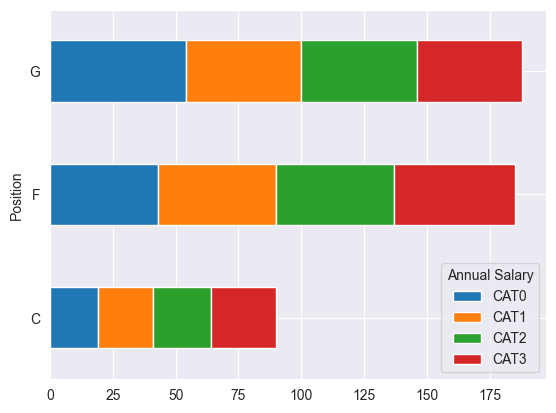

In [27]:
observed_p = pd.crosstab(df.Position, df["Annual Salary"])

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);

In [ ]:
# Conclusie 
# Er is niet voldoende reden om H0 te verwerpen => er bestaat geen verband tussen Position en Annual Salary.
# P-value is groter dan 5%